In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv("/Users/sarkiss./Desktop/Computer Science/Machine Learning/Sleeping Disorder/Sleep_health_and_lifestyle_dataset.csv")

df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## Expanding the Dataset 

Using a Statistical Technique called **Bootstrapping**, which repeatedly resamples a single dataset with replacement to create many simulated samples. We decided to create 9 separate bootstrapped datasets (that number can vary depending on the user) and then concatenated them all, using the pandas function **.concat(...)**, into a single dataset

In [732]:
# Number of bootstrapped datasets to create
num_bootstraps = 9

# Initialize an empty list to store bootstrapped datasets
bootstrapped_datasets = []

# Randomly sample rows with replacement to create a bootstrapped dataset
for x in range(num_bootstraps):
    bootstrapped_sample = df.sample(n = len(df), replace=True)
    
    # Append the bootstrapped dataset to the list
    bootstrapped_datasets.append(bootstrapped_sample)

#Save the bootstrapped datasets to separate CSV files
for i, bootstrapped_data in enumerate(bootstrapped_datasets):
    bootstrapped_data.to_csv(f'bootstrapped_dataset_{i}.csv', index=False)

In [289]:
#Reading all bootstrapped datasets
df1 = pd.read_csv("/Users/sarkiss./Desktop/Computer Science/Machine Learning/Sleeping Disorder/bootstrapped_dataset_0.csv")
df2 = pd.read_csv("/Users/sarkiss./Desktop/Computer Science/Machine Learning/Sleeping Disorder/bootstrapped_dataset_1.csv")
df3 = pd.read_csv("/Users/sarkiss./Desktop/Computer Science/Machine Learning/Sleeping Disorder/bootstrapped_dataset_2.csv")
df4 = pd.read_csv("/Users/sarkiss./Desktop/Computer Science/Machine Learning/Sleeping Disorder/bootstrapped_dataset_3.csv")
df5 = pd.read_csv("/Users/sarkiss./Desktop/Computer Science/Machine Learning/Sleeping Disorder/bootstrapped_dataset_4.csv")
df6 = pd.read_csv("/Users/sarkiss./Desktop/Computer Science/Machine Learning/Sleeping Disorder/bootstrapped_dataset_5.csv")
df7 = pd.read_csv("/Users/sarkiss./Desktop/Computer Science/Machine Learning/Sleeping Disorder/bootstrapped_dataset_6.csv")
df8 = pd.read_csv("/Users/sarkiss./Desktop/Computer Science/Machine Learning/Sleeping Disorder/bootstrapped_dataset_7.csv")
df9 = pd.read_csv("/Users/sarkiss./Desktop/Computer Science/Machine Learning/Sleeping Disorder/bootstrapped_dataset_8.csv")

#Concatenating all bootstrapped datasets into a single dataset
dfs = [df1,df2,df3,df4,df5,df6,df7,df8, df9]
df = pd.concat(dfs)
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,350,Female,57,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
1,158,Male,39,Lawyer,7.2,8,60,5,Normal,130/85,68,8000,None
2,190,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
3,171,Male,41,Lawyer,7.7,8,90,5,Normal,130/85,70,8000,None
4,229,Female,44,Teacher,6.6,7,45,4,Overweight,135/90,65,6000,Insomnia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,87,Male,35,Engineer,7.2,8,60,4,Normal,125/80,65,5000,None
370,118,Female,37,Accountant,7.2,8,60,4,Normal,115/75,68,7000,None
371,135,Male,38,Lawyer,7.3,8,60,5,Normal,130/85,68,8000,None
372,190,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia


## Data Preprocessing

In [290]:
print(df.dtypes) #Printing the types of each feature 

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


In [291]:
#Dropping Person ID column
df = df.drop(columns = ['Person ID'])

In [292]:
def describe_new(df): #function that adds range to the .describe() table
    df1 = df.describe() #stores  the original .describe() into df1
    df1.loc["range"] = df1.loc['max'] - df1.loc['min'] #creates another row for the ranges and calculates it by substracting max and min
    return df1

print(describe_new(df))

               Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
count  3366.000000     3366.000000       3366.000000              3366.000000   
mean     42.224302        7.140048          7.310160                58.825906   
std       8.720825        0.801792          1.211901                20.960488   
min      27.000000        5.800000          4.000000                30.000000   
25%      35.250000        6.400000          6.000000                45.000000   
50%      43.000000        7.200000          7.000000                60.000000   
75%      50.000000        7.800000          8.000000                75.000000   
max      59.000000        8.500000          9.000000                90.000000   
range    32.000000        2.700000          5.000000                60.000000   

       Stress Level   Heart Rate   Daily Steps  
count   3366.000000  3366.000000   3366.000000  
mean       5.371658    70.161319   6772.875817  
std        1.782535     4.182728   1613.75

In [293]:
#checking for missing values
missing_values = df.isnull().sum()
print(missing_values)


Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [294]:
#Checks the dataset for any NA values
print(df.isna().sum())

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [295]:
#Checking value counts of each variable in Occupations
print(df['Occupation'].value_counts())

#There were a couple instances were it said "Sales Representatives", we change those to "Salesperson"
df = df.replace(['Sales Representative'], 'Salesperson') 

#Also changed "Software Engineer" to just "Engineer"
df = df.replace(['Software Engineer'], 'Engineer') 

#Removing 'Manager' rows, because of Class Imbalance
df = df[df['Occupation'] != 'Manager']

print('\n', df['Occupation'].value_counts())

Doctor                  648
Nurse                   646
Engineer                577
Lawyer                  418
Teacher                 357
Accountant              322
Salesperson             291
Scientist                38
Software Engineer        36
Sales Representative     20
Manager                  13
Name: Occupation, dtype: int64

 Doctor         648
Nurse          646
Engineer       613
Lawyer         418
Teacher        357
Accountant     322
Salesperson    311
Scientist       38
Name: Occupation, dtype: int64


In [296]:
#Checking value counts of each variable in BMI Category
print(df['BMI Category'].value_counts()) 

#There were some instances were it said "Normal Weight" instead of Normal, we were able to manually change those
#One of the normal had a space, we couldnt find it manually so we used .replace(...) function to fix it
df = df.replace(['Normal Weight'], 'Normal') 
print('\n', df['BMI Category'].value_counts()) 

Normal           1774
Overweight       1315
Normal Weight     166
Obese              98
Name: BMI Category, dtype: int64

 Normal        1940
Overweight    1315
Obese           98
Name: BMI Category, dtype: int64


In [297]:
#Checking for Class Imbalances
df['Sleep Disorder'].value_counts()

None           1978
Sleep Apnea     695
Insomnia        680
Name: Sleep Disorder, dtype: int64

##### Blood pressure was initially a string type, we wanted it to be a float, so we created a new dataframe splitting it in two, Upper and Lower pressure

In [298]:
#Splitting Blood Pressure to Upper Value and Lower Value
df = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
df = df.rename(columns={0: 'BloodPressure_Upper_Value', 1: 'BloodPressure_Lower_Value'})

#Changing Blood Pressure Upper and Lower Values to type float
df['BloodPressure_Upper_Value'] = df['BloodPressure_Upper_Value'].astype(float)
df['BloodPressure_Lower_Value'] = df['BloodPressure_Lower_Value'].astype(float)

df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper_Value,BloodPressure_Lower_Value
0,Female,57,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140.0,95.0
1,Male,39,Lawyer,7.2,8,60,5,Normal,68,8000,None,130.0,85.0
2,Male,43,Salesperson,6.5,6,45,7,Overweight,72,6000,Insomnia,130.0,85.0
3,Male,41,Lawyer,7.7,8,90,5,Normal,70,8000,None,130.0,85.0
4,Female,44,Teacher,6.6,7,45,4,Overweight,65,6000,Insomnia,135.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Male,35,Engineer,7.2,8,60,4,Normal,65,5000,None,125.0,80.0
370,Female,37,Accountant,7.2,8,60,4,Normal,68,7000,None,115.0,75.0
371,Male,38,Lawyer,7.3,8,60,5,Normal,68,8000,None,130.0,85.0
372,Male,43,Salesperson,6.5,6,45,7,Overweight,72,6000,Insomnia,130.0,85.0


In [299]:
df.info() #function that shows all info of the database: # of tuples, # of columns, features, types, etc.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3353 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     3353 non-null   object 
 1   Age                        3353 non-null   int64  
 2   Occupation                 3353 non-null   object 
 3   Sleep Duration             3353 non-null   float64
 4   Quality of Sleep           3353 non-null   int64  
 5   Physical Activity Level    3353 non-null   int64  
 6   Stress Level               3353 non-null   int64  
 7   BMI Category               3353 non-null   object 
 8   Heart Rate                 3353 non-null   int64  
 9   Daily Steps                3353 non-null   int64  
 10  Sleep Disorder             3353 non-null   object 
 11  BloodPressure_Upper_Value  3353 non-null   float64
 12  BloodPressure_Lower_Value  3353 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 

## Visualization of Data to find Coorelation

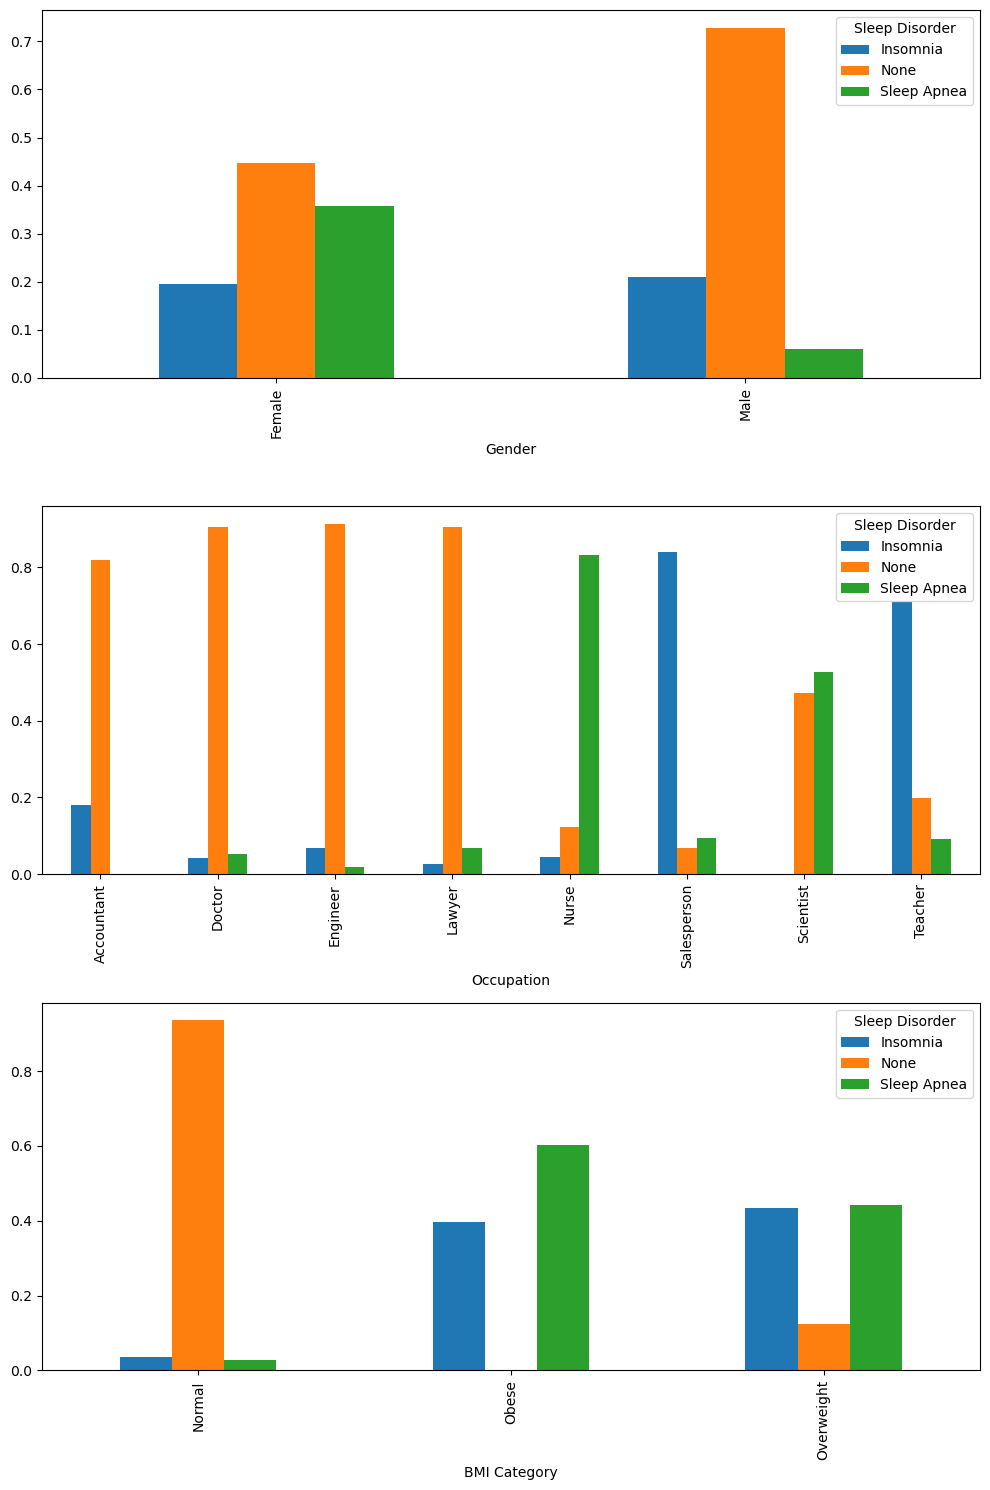

In [300]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

categorical_x = ["Gender", "Occupation", "BMI Category"]

for i,cat in enumerate(categorical_x):
    
    counts = (df.groupby([cat])['Sleep Disorder']
                      .value_counts(normalize = True)
                      .unstack())

    counts.plot(kind='bar', ax=axs[i])
    
fig.tight_layout()

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Sleep Duration', ylabel='Age'>,
        <Axes: xlabel='Quality of Sleep', ylabel='Age'>,
        <Axes: xlabel='Physical Activity Level', ylabel='Age'>,
        <Axes: xlabel='Stress Level', ylabel='Age'>,
        <Axes: xlabel='Heart Rate', ylabel='Age'>,
        <Axes: xlabel='Daily Steps', ylabel='Age'>,
        <Axes: xlabel='BloodPressure_Upper_Value', ylabel='Age'>,
        <Axes: xlabel='BloodPressure_Lower_Value', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Sleep Duration'>,
        <Axes: xlabel='Sleep Duration', ylabel='Sleep Duration'>,
        <Axes: xlabel='Quality of Sleep', ylabel='Sleep Duration'>,
        <Axes: xlabel='Physical Activity Level', ylabel='Sleep Duration'>,
        <Axes: xlabel='Stress Level', ylabel='Sleep Duration'>,
        <Axes: xlabel='Heart Rate', ylabel='Sleep Duration'>,
        <Axes: xlabel='Daily Steps', ylabel='Sleep Duration'>,
        <Axes: xlabel='BloodPressure_U

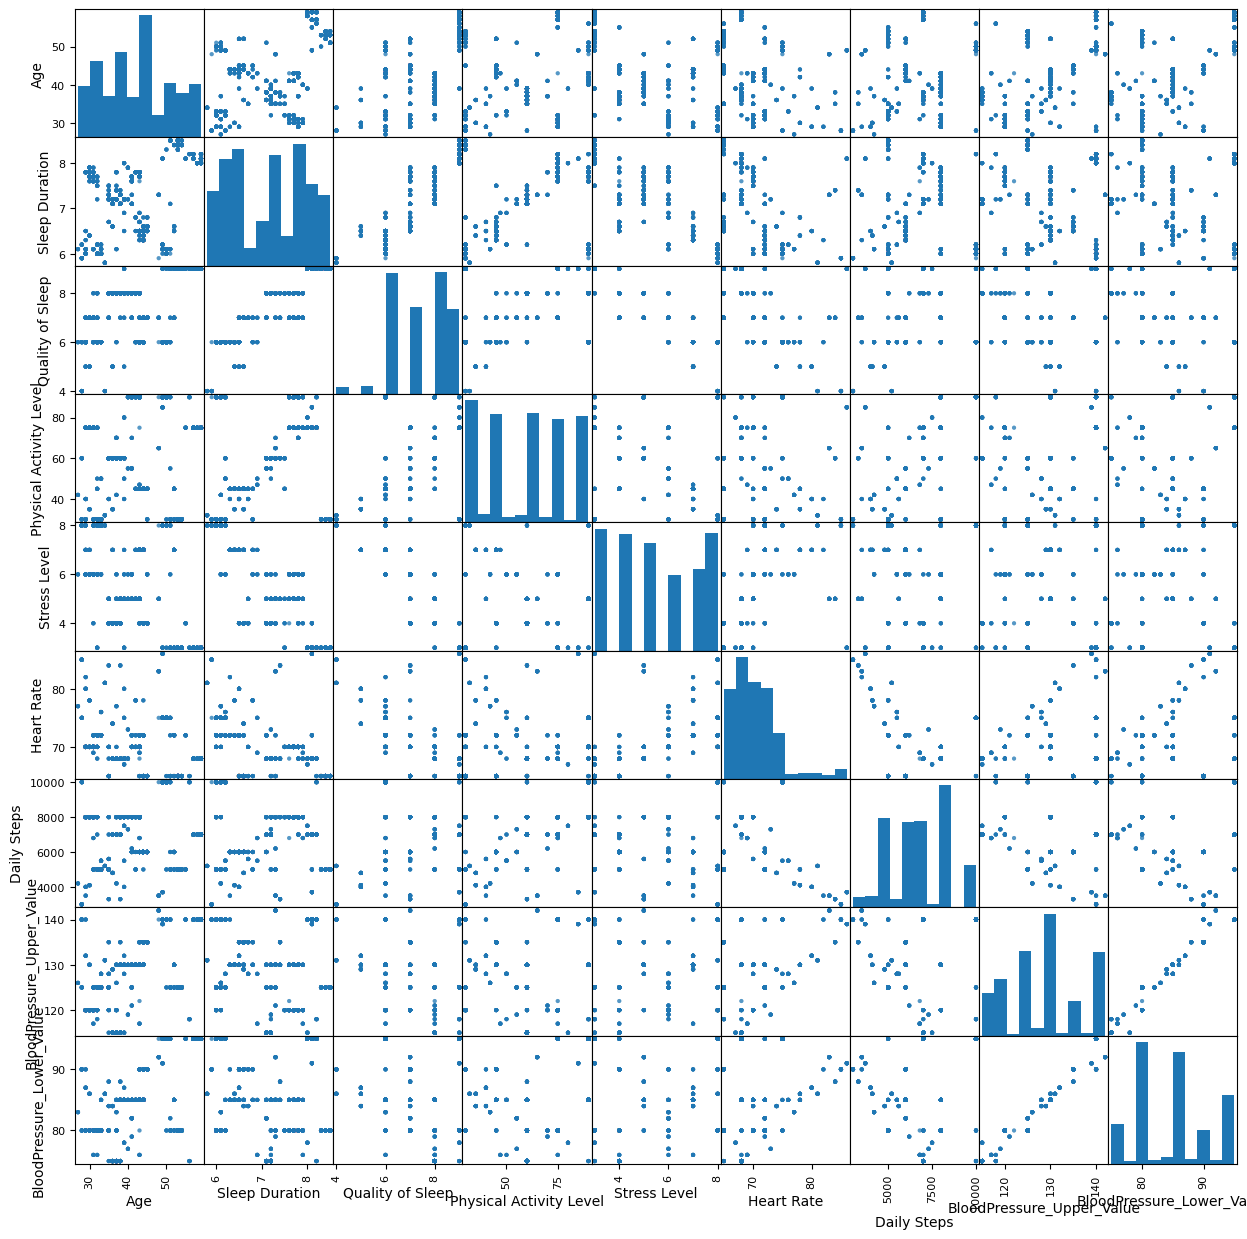

In [301]:
pd.plotting.scatter_matrix(df, figsize = (15,15))

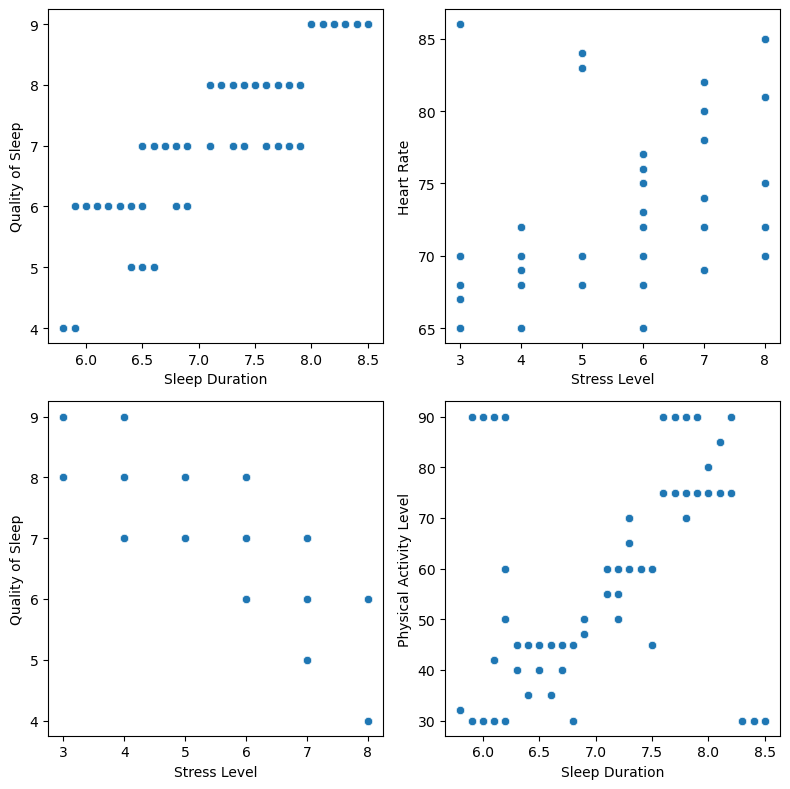

In [302]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))#Creates four separate boxplots, 
                                             #figsize enlarges the plots so that it is more visble

sns.scatterplot(df, x = 'Sleep Duration', y = 'Quality of Sleep', ax = axes[0,0])
sns.scatterplot(df, x = 'Stress Level', y = 'Quality of Sleep', ax = axes[1,0])
sns.scatterplot(df, x = 'Stress Level', y = 'Heart Rate', ax = axes[0,1])
sns.scatterplot(df, x = 'Sleep Duration', y = 'Physical Activity Level', ax = axes[1,1])

fig.tight_layout() #Separates the subplots so that they're not cramped together

<Axes: xlabel='Sleep Disorder', ylabel='BloodPressure_Lower_Value'>

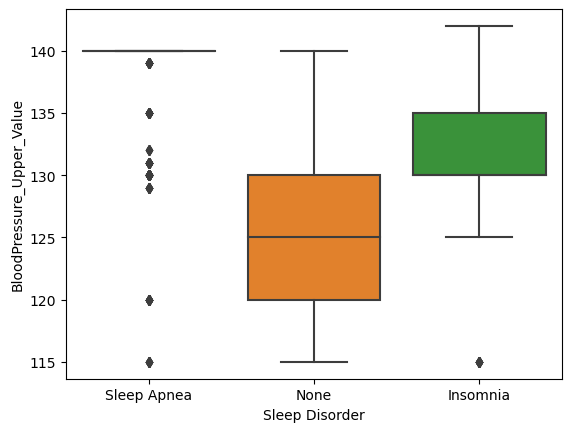

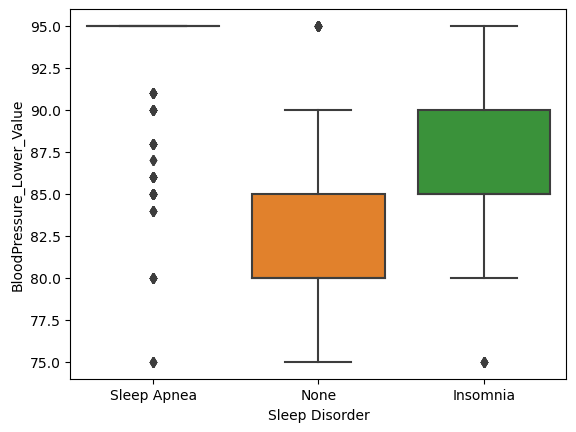

In [303]:
plt.figure(1)
sns.boxplot(data = df, x = "Sleep Disorder", y = "BloodPressure_Upper_Value")

plt.figure(2)
sns.boxplot(data = df, x = "Sleep Disorder", y = "BloodPressure_Lower_Value")

### Feature Engineering

In [304]:
from sklearn.preprocessing import LabelEncoder

#Using LabelEncoder to Convert Occupations, Gender and BMI to Numerical Values
LE = LabelEncoder()
df["Occupation"] = LE.fit_transform(df["Occupation"])
df["Gender"] = LE.fit_transform(df["Gender"])
df["BMI Category"] = LE.fit_transform(df["BMI Category"])

#Converting Sleep Disorder to Numerical Values
df = df.replace(['None'], 0) 
df = df.replace(['Insomnia'], 1) 
df = df.replace(['Sleep Apnea'], 2) 

df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper_Value,BloodPressure_Lower_Value
0,0,57,4,8.1,9,75,3,2,68,7000,2,140.0,95.0
1,1,39,3,7.2,8,60,5,0,68,8000,0,130.0,85.0
2,1,43,5,6.5,6,45,7,2,72,6000,1,130.0,85.0
3,1,41,3,7.7,8,90,5,0,70,8000,0,130.0,85.0
4,0,44,7,6.6,7,45,4,2,65,6000,1,135.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,35,2,7.2,8,60,4,0,65,5000,0,125.0,80.0
370,0,37,0,7.2,8,60,4,0,68,7000,0,115.0,75.0
371,1,38,3,7.3,8,60,5,0,68,8000,0,130.0,85.0
372,1,43,5,6.5,6,45,7,2,72,6000,1,130.0,85.0


<Axes: >

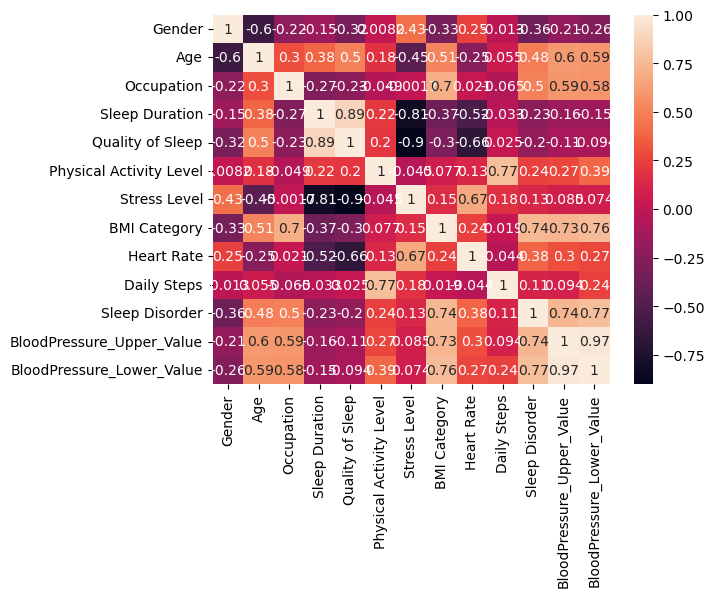

In [305]:
sns.heatmap(df.corr(numeric_only = True), annot = True)

In [306]:
X = df.drop('Sleep Disorder', axis = 1)
Y = df['Sleep Disorder']

In [307]:
#Using random forest to find feature importance
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

#Trains the model
clf.fit(X, Y)

#Calculates the feature importance
importances = clf.feature_importances_

#Prints the feature importance
print(importances)
names = X.keys()

[0.00440743 0.08943961 0.13156528 0.10179909 0.020447   0.05142642
 0.02323044 0.1789966  0.04925721 0.04971148 0.1338224  0.16589705]


In [308]:
#Sorting Features and Feature names
indices = np.argsort(importances)[::-1]
sorted_feature_names = [names[i] for i in indices]
sorted_importances = importances[indices]

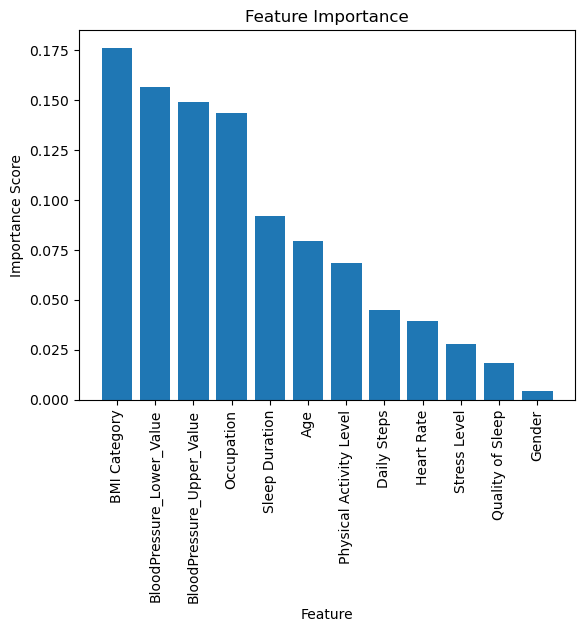

In [309]:
#Plotting Feature Importance in a barchart
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation='vertical')
plt.show()

In [310]:
#Dropping the least important Features
df = df.drop(columns = ['Gender'])
df = df.drop(columns = ['Daily Steps'])
df = df.drop(columns = ['Quality of Sleep'])
df = df.drop(columns = ['Stress Level'])

#Like 'BloodPressure_Upper_Value',it has a very high coorelation to the target, dropping to reduce redundency
df = df.drop(columns = ['BloodPressure_Lower_Value'])


## Training and Testing Data using Decision Tree

In [311]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

In [312]:
#Decision Tree Model
#Test Entropy and Gini Calculations
#Applying GridSearch to check which metrics work best

parameters = {
              'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

#Decision Tree
model = DecisionTreeClassifier()
gridDecisionTree = RandomizedSearchCV(model, parameters, cv = 3, n_jobs = -1)
gridDecisionTree.fit(X_train, y_train)

print('Min Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Min Split:  4
Max Nvl:  11
Algorithm:  entropy
Score:  0.9377330350484713


In [314]:
#Running Decision Tree
tree_clf = DecisionTreeClassifier(criterion = "entropy", min_samples_split = 4, max_depth = 11)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=4)

In [315]:
y_pred = tree_clf.predict(X_test)

### Evaluating Decision Tree Model

In [316]:
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       382
           1       0.91      0.97      0.94       155
           2       0.95      0.91      0.93       134

    accuracy                           0.95       671
   macro avg       0.94      0.95      0.94       671
weighted avg       0.95      0.95      0.95       671



In [317]:
#Confusion Matrix for performance evaluation 
cm = confusion_matrix(y_test, y_pred)

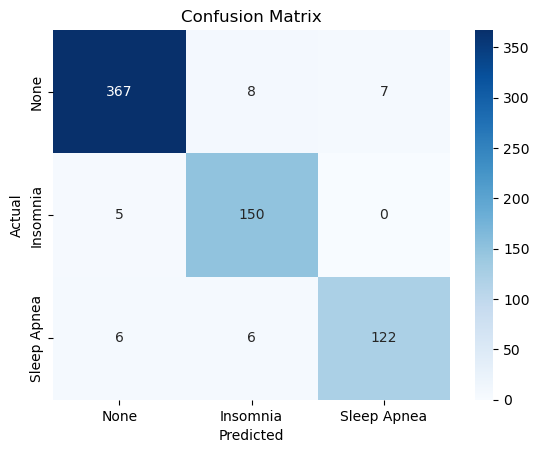

In [318]:
sns.heatmap(cm, 
            annot = True,
            fmt = 'g',
            cmap = 'Blues',
            xticklabels = ['None', 'Insomnia', 'Sleep Apnea'],
            yticklabels = ['None', 'Insomnia', 'Sleep Apnea'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Training and Testing Data using Neural Network

In [319]:
from keras.models import Sequential  # Model type to be used
from keras.layers import Dense, Dropout, Activation # Types of layers for the model
import tensorflow.keras.utils as utils # for converting array of labeled data to one-hot vector. 

In [320]:
#Assigning the features to X and Target to Y
X = df.drop('Sleep Disorder', axis = 1).values
Y = df['Sleep Disorder'].values.reshape(-1,1)

In [325]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

#Normalizes the features 
X = sc.fit_transform(X)
X.shape

(3353, 7)

In [326]:
from sklearn.preprocessing import OneHotEncoder

#Transforming the Categorical Data into Numerical, and turning it into a 2D Array
ohe = OneHotEncoder()
Y = ohe.fit_transform(Y).toarray()
Y.shape

(3353, 3)

In [327]:
#Splitting the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

In [332]:
#Creating the Neural Network Model
model = Sequential()
# The first hidden layer will have 300 neurons
model.add(Dense(300, input_shape=(7,))) #There are 7 features being inputted
model.add(Activation('relu')) #f(x) = max(0, x), which sets all negative values to 0
model.add(Dropout(0.2)) # Used to Prevent Model from overfitting 

# The second hidden layer will also have 300 neurons
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# The final layer is output that has 3 classes
model.add(Dense(3))
model.add(Activation('softmax')) #Function that converts a vector into a probability distribution

# Summarizes the built model
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 300)               2400      
                                                                 
 activation_42 (Activation)  (None, 300)               0         
                                                                 
 dropout_28 (Dropout)        (None, 300)               0         
                                                                 
 dense_43 (Dense)            (None, 300)               90300     
                                                                 
 activation_43 (Activation)  (None, 300)               0         
                                                                 
 dropout_29 (Dropout)        (None, 300)               0         
                                                                 
 dense_44 (Dense)            (None, 3)               

In [333]:
#Compiling the Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [334]:
#Training the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 200, epochs = 15, verbose=1)

Epoch 1/15
14/14 [==============================] - 1s 18ms/step - loss: 0.8427 - accuracy: 0.6853 - val_loss: 0.5528 - val_accuracy: 0.8689
Epoch 2/15
14/14 [==============================] - 0s 8ms/step - loss: 0.5284 - accuracy: 0.8494 - val_loss: 0.4242 - val_accuracy: 0.8703
Epoch 3/15
14/14 [==============================] - 0s 8ms/step - loss: 0.4526 - accuracy: 0.8639 - val_loss: 0.3778 - val_accuracy: 0.8957
Epoch 4/15
14/14 [==============================] - 0s 9ms/step - loss: 0.4130 - accuracy: 0.8799 - val_loss: 0.3443 - val_accuracy: 0.8957
Epoch 5/15
14/14 [==============================] - 0s 8ms/step - loss: 0.3798 - accuracy: 0.8863 - val_loss: 0.3215 - val_accuracy: 0.8972
Epoch 6/15
14/14 [==============================] - 0s 8ms/step - loss: 0.3596 - accuracy: 0.8893 - val_loss: 0.3025 - val_accuracy: 0.8987
Epoch 7/15
14/14 [==============================] - 0s 8ms/step - loss: 0.3349 - accuracy: 0.9004 - val_loss: 0.2940 - val_accuracy: 0.9061
Epoch 8/15
14/14 [=

#### Plotting the Learning Curve

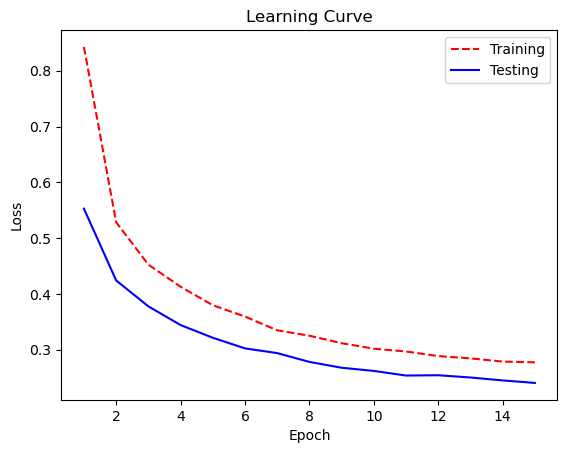

In [342]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training', 'Testing'])
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

### Evaluating Neural Network 

In [336]:
#Predicting targets with the test cases
y_pred = model.predict(X_test)

21/21 [==============================] - 0s 2ms/step


In [337]:
y_pred_class = np.argmax(y_pred, axis = 1)
y_test_class = np.argmax(y_test, axis = 1)

In [338]:
#Creating the Confusion Matrix
cm = confusion_matrix(y_test_class, y_pred_class)

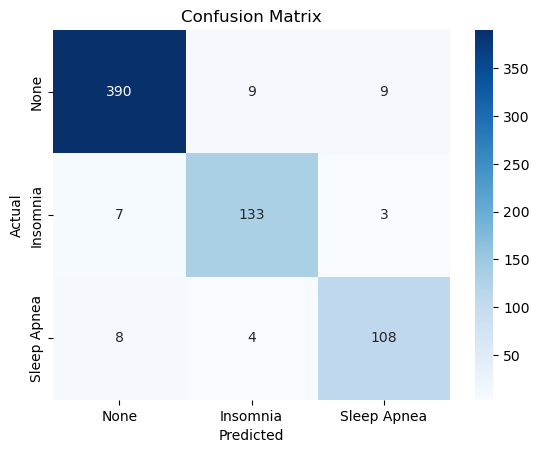

In [339]:
#Visualizes the Confusion Matrix as a heatmap
sns.heatmap(cm, 
            annot = True,
            fmt = 'g',
            cmap = 'Blues',
            xticklabels = ['None', 'Insomnia', 'Sleep Apnea'],
            yticklabels = ['None', 'Insomnia', 'Sleep Apnea'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [340]:
#Classification Report showing the performance accuracy of the model
print("Classification Report:\n", classification_report(y_test_class, y_pred_class, target_names= ['None', 'Insomnia', 'Sleep Apnea']))

Classification Report:
               precision    recall  f1-score   support

        None       0.96      0.96      0.96       408
    Insomnia       0.91      0.93      0.92       143
 Sleep Apnea       0.90      0.90      0.90       120

    accuracy                           0.94       671
   macro avg       0.92      0.93      0.93       671
weighted avg       0.94      0.94      0.94       671

